In [1]:
# Official tutorials: https://www.tensorflow.org/tutorials
# keras totutial for MNIST: https://www.tensorflow.org/tutorials/quickstart/beginner

In [2]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# Build an easy calculator
a = tf.placeholder(dtype=tf.float32, shape=[3,3])
b = tf.placeholder(dtype=tf.float32, shape=[3,3])
c = a+b
d = tf.matmul(a, b)
print(a)
print(b)
print(c)
print(d)

Tensor("Placeholder:0", shape=(3, 3), dtype=float32)
Tensor("Placeholder_1:0", shape=(3, 3), dtype=float32)
Tensor("add:0", shape=(3, 3), dtype=float32)
Tensor("MatMul:0", shape=(3, 3), dtype=float32)


In [4]:
sess = tf.Session()
a_input = np.array([[1,1,1],[2,2,2],[3,3,3]])
b_input = np.array([[1,2,3],[1,2,3],[1,2,3]])
my_feed_dict = {a: a_input, b: b_input}
res = sess.run([c,d], feed_dict=my_feed_dict)
print(res[0])
print(res[1])

[[2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]
[[ 3.  6.  9.]
 [ 6. 12. 18.]
 [ 9. 18. 27.]]


In [5]:
e = tf.Variable(0.0)
e_add = tf.assign(e, e+1)

In [ ]:
print(sess.run(e))

In [6]:
sess.run(tf.global_variables_initializer())
print(sess.run(e))
sess.run(e_add)
print(sess.run(e))

0.0
1.0


In [7]:
# build an easy neuron network
# load in the data 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


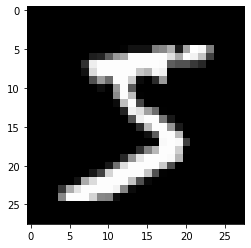

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

In [9]:
# define structure: 784-->256-->10
input_img = tf.placeholder(dtype=tf.float32, shape=[None, 28*28], name='input')
labels = tf.placeholder(dtype=tf.int32, shape=[None], name='label')
h1 = tf.layers.dense(input_img, units=256, name='h1')
h1 = tf.nn.relu(h1)
h2 = tf.layers.dense(h1, units=10, name='h2')
output = tf.nn.softmax(h2)
print(h1.shape)
print(h2.shape)
print(output.shape)
print(labels.shape)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
(?, 256)
(?, 10)
(?, 10)
(?,)


In [15]:
# define loss and optimizer
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=output, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
update = optimizer.minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
epoch = 100
epoch_accuracies = []
num_iter = 180
start = 0
for j in range (epoch):
    epoch_accuracy = 0.0
    for it in range (num_iter):
        start += 10
        start %= 60000
        cur_input = np.reshape(x_train[start:(start+10)], (10, 784))
        cur_label = y_train[start:(start+10)]
        my_feed_dict = {input_img: cur_input, labels:cur_label}
        preds,_ = sess.run([output, update], feed_dict=my_feed_dict)
        preds_label = np.argmax(preds, axis=1)
        acc_iter = np.sum(1*(preds_label)==(cur_label))/10
        epoch_accuracy += acc_iter
    epoch_accuracy =  epoch_accuracy/180
    if (j >= 90):
        print (j)
        print (epoch_accuracy)
    epoch_accuracies.append(epoch_accuracy)

90
0.9544444444444453
91
0.9533333333333343
92
0.9527777777777791
93
0.948333333333334
94
0.9505555555555563
95
0.9627777777777786
96
0.9594444444444454
97
0.9627777777777786
98
0.9716666666666671
99
0.976666666666667


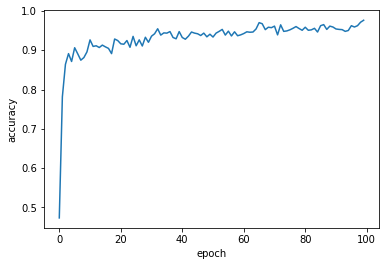

In [17]:
plt.plot(epoch_accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()